In [133]:
import numpy as np
import uproot as up
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.mlab as mlab
from scipy.stats import norm
import pylandau

#### First, open the root file with uproot and save the times to a Numpy Array

In [134]:
particle = "mu"
# particle = "mu"
length = "1.5"
length_dict = {
    "2.5" : "2_5",
    "2" : "2",
    "1.5" : "1_5"
}
color_dict = {
    "pi" : "green",
    "mu" : "blue"
}

In [178]:
# uproot_path = f"/cwork/rck32/eic/work_eic/root_files/time_res/one_segment_sensor_in_volume/{particle}_5GeV_10000events_{length_dict[length]}m_1cm_3cm.edm4hep.root:events"
# uproot_path = f"/cwork/rck32/eic/work_eic/root_files/time_res/one_segment_sensor_in_volume/{particle}_5GeV_10000events_{length_dict[length]}m_1cm_3cm_no_q_eff.edm4hep.root:events"
uproot_path = f"~/cworkdir/eic/work_eic/root_files/time_res/one_segment_test/mu_5GeV_1kevents_1_5m_1cm_3cm_test.edm4hep.root:events"
events = up.open(uproot_path)

times = events["HcalBarrelHits/HcalBarrelHits.time"].array(library='np')

#### Now we can loop over all events with the first index of the array and cut events with <2 optical photons
Goal: skip events with only 1 hit (noise) and search remaining events for first photon, ie photon with lowest time. Take that time 

In [179]:
def avg(inlist):
    return sum(inlist) / len(inlist)

In [180]:
accepted_times = []

#Note - array.shape[0] gives the first dimension of the array
for event_num in range(times.shape[0]):
    if(times[event_num].shape[0] < 2): continue
    if(min(times[event_num]) > 12.5 or min(times[event_num]) < 9): continue
    accepted_times.append(min(times[event_num]))

#### We can plot the times in a histogram to visualize the result

#### Now we need to calculate the standard deviation and mean of this distribution

resolution (sigma): 0.184 | mean: 10.53 | FWHM: 0.432


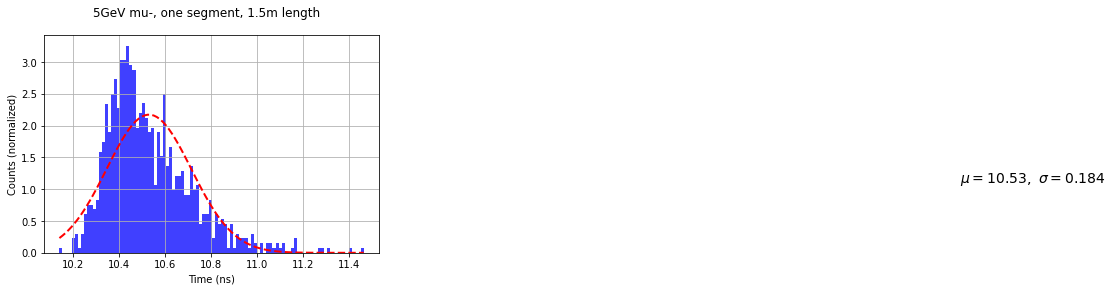

In [181]:
fig, axs = plot.subplots(1, 1)

(mu, sigma) = norm.fit(accepted_times)
n, bins, patches = plot.hist(accepted_times, 100, facecolor=color_dict[particle], alpha=0.75, density=True)
fig.suptitle(f"5GeV {particle}-, one segment, {length}m length")

y = norm.pdf( bins, mu, sigma)
l = axs.plot(bins, y, 'r--', linewidth=2)
axs.set_xlabel('Time (ns)')
axs.set_ylabel('Counts (normalized)')
axs.grid(True)
axs.text(14.05,1.1,r'$\mu=%4.2f,\ \sigma=%4.3f$'%(mu,sigma),fontsize=14)

fig.show()
# fig.savefig(f"plots/{particle}_5GeV_{length_dict[length]}m_new_sensor_placement_100_events_new_q_eff.svg")
print("resolution (sigma): %4.3f | mean: %4.2f | FWHM: %4.3f" %(sigma,mu,(2.35 * sigma)))

In [35]:
counts = []
counts_cut = []
for i in range(times.shape[0]):
    count = len(times[i])
    counts.append(len(times[i]))
    if(count < 2 or count > 250):continue
    counts_cut.append(len(times[i]))
max_count = max(counts_cut)
min_count = min(counts_cut)
n_bins = max_count - min_count

Mean: 15.68 | Sigma: 5.542


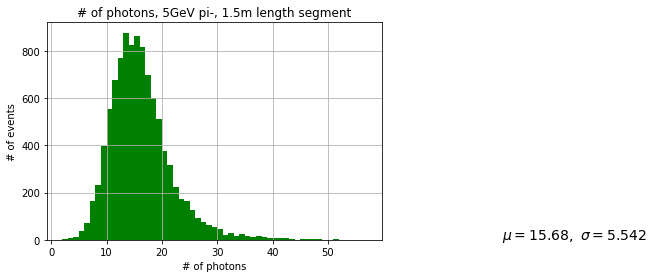

In [112]:
(mu, sigma) = norm.fit(counts_cut)
n, bins, patches = plot.hist(counts_cut, bins=n_bins, density = False,facecolor=color_dict[particle])
plot.title(f"# of photons, 5GeV {particle}-, {length}m length segment")
plot.xlabel("# of photons")
plot.ylabel("# of events")
plot.text(81.5,3,r'$\mu=%4.2f,\ \sigma=%4.3f$'%(mu,sigma),fontsize=14)
plot.grid(True)

plot.plot
plot.savefig(f"plots/counts/{particle}_counts_5GeV_{length_dict[length]}m_new_sensor_placement_10k_events_new_q_eff.svg")
print("Mean: %4.2f | Sigma: %4.3f"%(mu,sigma))

In [166]:
uproot_path = f"~/cworkdir/eic/work_eic/root_files/time_res/one_segment_test/mu_5GeV_1kevents_1_5m_1cm_3cm_test.edm4hep.root:events"
events = up.open(uproot_path)
cells = events["HcalBarrelHits/HcalBarrelHits.cellID"].array(library='np')
x_pos_branch = events["HcalBarrelHits/HcalBarrelHits.position.x"].array(library='np')
y_pos_branch = events["HcalBarrelHits/HcalBarrelHits.position.y"].array(library='np')
z_pos_branch = events["HcalBarrelHits/HcalBarrelHits.position.z"].array(library='np')

In [139]:
duplicates = 0
total = 0
total_cells = []
for i in range(len(cells)):
    curr_list = []
    for j in range(len(cells[i])):
        if(cells[i][j] in curr_list):
            duplicates += 1
        else:
            curr_list.append(cells[i][j])
        if(cells[i][j] not in total_cells):
            total_cells.append(cells[i][j])
        total += 1
print(f"total: {total} | duplicates: {duplicates} | ratio: {duplicates / total} | num unique cells hit: {len(total_cells)}")

total: 40495 | duplicates: 1251 | ratio: 0.030892702802815163 | num unique cells hit: 2547


In [150]:
np.sqrt(3) / ((50 * 0.0001))

346.41016151377545

In [172]:
x_pos = []
for i in range(len(x_pos_branch)):
    for j in range(len(x_pos_branch[i])):
        x_pos.append(x_pos_branch[i][j])
y_pos = []
for i in range(len(y_pos_branch)):
    for j in range(len(y_pos_branch[i])):
        y_pos.append(y_pos_branch[i][j])
z_pos = []
for i in range(len(z_pos_branch)):
    for j in range(len(z_pos_branch[i])):
        if(z_pos_branch[i][j] > 767.45):
            z_pos.append(z_pos_branch[i][j])

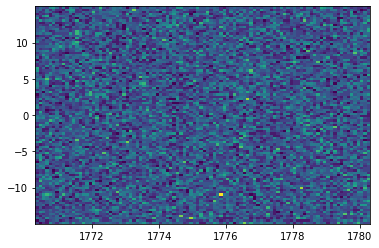

In [176]:
plot.hist2d(x_pos,y_pos,100)
plot.show()

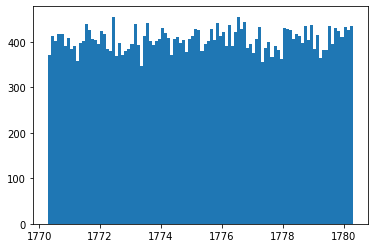

In [177]:
plot.hist(x_pos,100)
plot.show()